In [1]:
import os
import sys
import json
import fiona
import matplotlib

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

from pyproj import Transformer
from shapely import wkt
from colormap import rgb2hex
from shapely.geometry import Point, Polygon

sys.path.insert(0, '..')
from loaders.datasets import AmsterdamDataset
from utils.augmentation import *
from utils.general import visualize

In [2]:
df = pd.read_csv(os.path.join('..', 'data', 'fences-quays', 'metadata.csv'))
gdf = gpd.read_file(os.path.join('..', 'data', 'geometry', 'buurten.geojson'))

buurten = gpd.read_file(os.path.join('..', 'data', 'geometry', 'buurten.geojson'))
water = gpd.read_file(os.path.join('..', 'data', 'geometry', 'water.geojson'))

In [3]:
print(df[df.subset == 'test'].labels.value_counts())
print(df[df.subset == 'train'].labels.value_counts())
print(df[df.subset == 'valid'].labels.value_counts())

1    129
0     34
Name: labels, dtype: int64
1    1173
0     509
Name: labels, dtype: int64
1    112
0     43
Name: labels, dtype: int64


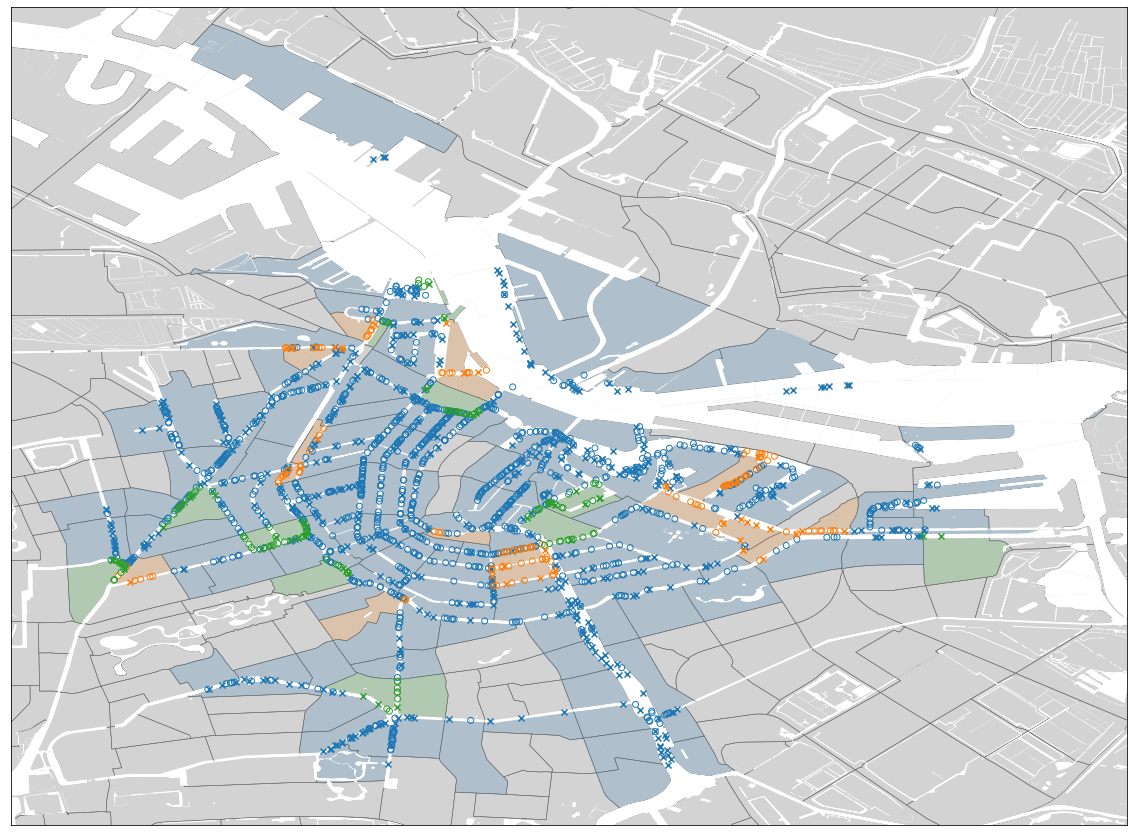

In [4]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (20,20)

subsets = ['train', 'test', 'valid']

ax = buurten.plot(color='none', edgecolor='dimgray', linewidth=.5)

def f(x):
    try:
        return x.representative_point().coords[:]
    except:
        return 0

for subset, color in zip(subsets, plt.get_cmap('tab10').colors):
    label = subset
    subset = df[df.subset == subset]
    
    subset = subset.drop_duplicates(subset='Buurtnaam', keep='first')
    subset = gpd.GeoDataFrame(subset.geometry.apply(wkt.loads))
    
    subset.plot(ax=ax, color=color, alpha=.2)
    
water.plot(ax=ax, color='white')
    
for subset, color in zip(subsets, plt.get_cmap('tab10').colors):
    label = subset
    subset = df[df.subset == subset]
    
    locations = gpd.GeoDataFrame(subset, geometry=subset.location.apply(wkt.loads))
    
    locations[locations.labels == 0].plot(ax=ax, color=color, marker='x')
    locations[locations.labels == 1].plot(ax=ax, marker='o', color='none', edgecolor=color)

ax.set_aspect('equal', adjustable='box')
ax.set_facecolor('lightgrey')

plt.xlim(4.8475, 4.96)
plt.ylim(52.3375, 52.42)

ax.xaxis.set_major_locator(plt.NullLocator())
ax.yaxis.set_major_locator(plt.NullLocator())

plt.show()

In [5]:
for color in plt.get_cmap('tab10').colors:
    print(matplotlib.colors.to_hex(color))

#1f77b4
#ff7f0e
#2ca02c
#d62728
#9467bd
#8c564b
#e377c2
#7f7f7f
#bcbd22
#17becf
